In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
import plotly.express as px

In [18]:
data = pd.read_csv('user_data.csv')

In [19]:
data.head()

,user_id,stage,conversion
0,user_0,homepage,True
1,user_1,homepage,True
2,user_2,homepage,True
3,user_3,homepage,True
4,user_4,homepage,True


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17175 entries, 0 to 17174
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     17175 non-null  object
 1   stage       17175 non-null  object
 2   conversion  17175 non-null  bool  
dtypes: bool(1), object(2)
memory usage: 285.3+ KB


In [21]:
data.describe()

,user_id,stage,conversion
count,17175,17175,17175
unique,17175,5,2
top,user_0,homepage,True
freq,1,10000,13014


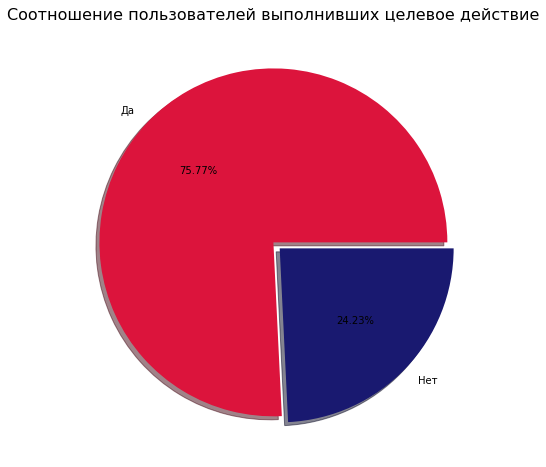

In [64]:
conversion = data['conversion'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(x = conversion.values, autopct='%.2f%%', labels=('Да', 'Нет'),\
        explode=(0, 0.05), shadow=True, colors=('#DC143C', '#191970'))
plt.title('Соотношение пользователей выполнивших целевое действие', fontsize=16)
plt.show()

<p style="font-size:16px;"> Небольшое пояснение, что такое конверсия и почему вдруг "соотношение пользователей выполнивших целевое действие". <br><b><i>Конверсия</i></b> - это соотношение пользователей, выполнивших целевое действие к общему числу пользователей. <br>Целевое действие может быть разным - совершить покупку, перейти на страницу, заполнить форму обратной связи, открыть информационную страницу, обратиться к консультанту на сайте и т.д. </p>

<p style="font-size:16px;">Таким образом, в данном анализе 75.77% пользователей выполняют целевое действие</p>

In [67]:
conversion = data.groupby(['stage', 'conversion'], as_index=False).count().\
    sort_values(by='user_id', ascending=False)

In [68]:
conversion

,stage,conversion,user_id
4,homepage,True,10000
6,product_page,True,2515
5,product_page,False,2485
0,cart,False,1051
1,cart,True,449
2,checkout,False,414
7,purchase,False,211
3,checkout,True,36
8,purchase,True,14


In [69]:
fig = px.funnel(conversion, y='stage', x='user_id', color='conversion',
                color_discrete_map={True: "#DC143C", 
                                    False: "#191970"},
                template="simple_white",
                title='Конверсия пользователей сайта',
                labels={"stage": ""})
fig.show()

In [63]:
from plotly import graph_objects as go

fig = go.Figure(
    go.Funnelarea(
        labels=conversion['stage'],
        values=conversion['user_id'],
        textfont_size=40,
        title='Конверсия пользователей сайта'
    )
)

fig.show()

<p style="font-size:16px;">
Что мы видим из 2 воронок, числовой и в процентах:
    <ul>
        <li>Из 17175 пользователей, 58.2% (10000) заходят на главную страницу</li>
        <li>5000 пользователей (29.1%) заходят на страницу товара - возможно из поисковой системы или по гиперссылке</li>
        <li>1500 пользователей (8.73%) заходят на страницу корзины.</li>
        <li>450 пользователей (2.62%) заходят на страницу подтверждения</li>
        <li>225 пользователей (1.31%) заходят на страницу совершения покупки</li>
    </ul>
</p>